<a href="https://colab.research.google.com/github/seismosmsr/hawaii_soils/blob/main/BPCA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c('data.table','ggplot2','magrittr','rstatix','plotrix','ggsignif',"googledrive",'openxlsx'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘Rcpp’




In [2]:
install.packages('openxlsx')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(data.table)
library(ggplot2)
library(magrittr)
library(rstatix)
library(ggsignif)
library(plotrix)
library(googledrive)
library(openxlsx)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [40]:
# bpca_dt <- fread('/content/BPCA_HPLC_LF.csv')
# standards_dt <- fread('/content/BPCA6_standards.csv')
LF_stoic_dt_old <- fread('/content/Postfire Soils BPCA - LF_subset.csv')

In [5]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=7fe9c2cd4a8f89f471ade70f73cf1889&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbEYtbkg1cHNsZ2Etd0tkdWpLekZOblVJM2ktX21HZnRqcnRIbU1pM25mYnJJbjVmZlpoWVJpRnYwY0djeTFPQSIsInN0YXRlIjoiN2ZlOWMyY2Q0YThmODlmNDcxYWRlNzBmNzNjZjE4ODkifQ==


In [6]:
# https://docs.google.com/spreadsheets/d/1uoBy87pdp8sByoTocX6MGIIBpW9KIGC8oZWwzlbXj7Y/edit?usp=sharing

In [7]:
# Hawaii GEDI data
# https://drive.google.com/file/d/1UY3lxML0Y7bat_9-xEZQQHDkYRcODDZy/view?usp=drive_link
drive_download(file = as_id('1uoBy87pdp8sByoTocX6MGIIBpW9KIGC8oZWwzlbXj7Y'), path =  '/content/2024_holidayfarmfire.xlsx', overwrite = FALSE)
# gedi_sf <- st_read('/content/predictor_variables/Hawaii_GEDI_4A.gpkg')

File downloaded:

• 2024_holidayfarmfire <id: 1uoBy87pdp8sByoTocX6MGIIBpW9KIGC8oZWwzlbXj7Y>

Saved locally as:

• /content/2024_holidayfarmfire.xlsx



In [8]:
SheetNames<-getSheetNames('/content/2024_holidayfarmfire.xlsx')
print(SheetNames)

data_list <- SheetNames %>%
             lapply(function(x){
                #Read the i'th sheet
             openxlsx::read.xlsx('/content/2024_holidayfarmfire.xlsx', x) %>% data.table
             })

names(data_list) <- SheetNames

[1] "Site Locations"         "Soil Samples"           "CWD"                   
[4] "Decay and burn classes" "Frac BPCA"              "BPCA Standards"        


In [9]:
standards_2_dt <- data_list[['BPCA Standards']][Treatment == 'standard']

In [10]:
standards_2_dt$stock_concentration_mg_per_ml <- c(1/800,1/400,1/200,1/100,1/50,1/10,1)*(2/3)
# standards_2_dt$stock_concentration_mg_per_ml_alt <- c(1/800,1/400,1/200,1/100,1/50,1/10,1)
standards_2_dt$PA_240_nm  <- standards_2_dt$`240_nm_PA`
standards_2_dt$PA_216_nm  <- standards_2_dt$`216_nm_PA`

In [12]:
# standards_dt %>% head
# lm('stock_concentration_mg_per_ml~PA_216_nm',standards_dt) %>% summary
conc_240_lm <- lm('stock_concentration_mg_per_ml~PA_240_nm',standards_2_dt)
conc_216_lm <- lm('stock_concentration_mg_per_ml~PA_216_nm',standards_2_dt)
conc_240_lm %>% summary
conc_216_lm %>% summary


Call:
lm(formula = "stock_concentration_mg_per_ml~PA_240_nm", data = standards_2_dt)

Residuals:
        1         2         3         4         5         6         7 
 0.010089  0.010557  0.009807  0.005208 -0.002146 -0.040517  0.007002 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.106e-02  8.600e-03  -1.285    0.255    
PA_240_nm    3.858e-08  1.288e-09  29.960 7.77e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02016 on 5 degrees of freedom
Multiple R-squared:  0.9945,	Adjusted R-squared:  0.9934 
F-statistic: 897.6 on 1 and 5 DF,  p-value: 7.77e-07



Call:
lm(formula = "stock_concentration_mg_per_ml~PA_216_nm", data = standards_2_dt)

Residuals:
        1         2         3         4         5         6         7 
 0.006833  0.007300  0.006870  0.003657 -0.002204 -0.026349  0.003894 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.507e-03  5.616e-03  -1.515     0.19    
PA_216_nm    1.731e-08  3.785e-10  45.731 9.44e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01323 on 5 degrees of freedom
Multiple R-squared:  0.9976,	Adjusted R-squared:  0.9971 
F-statistic:  2091 on 1 and 5 DF,  p-value: 9.441e-08


In [13]:
bpca_dt <- data_list[['BPCA Standards']]

bpca_dt$PA_240_nm  <- bpca_dt$`240_nm_PA`
bpca_dt$PA_216_nm  <- bpca_dt$`216_nm_PA`

In [14]:
bpca_dt[,conc_240 := predict(conc_240_lm,data.frame(PA_240_nm=PA_240_nm))]
bpca_dt[,conc_216 := predict(conc_216_lm,data.frame(PA_216_nm= (PA_216_nm )))]
bpca_dt[Treatment!='standard',conc_216 := (conc_216^2)/10]

In [15]:
 bpca_dt[BPCA_ID == 'R65 V22']$PA_240_nm <- NA #Has a reading of >1 in 240 (1.2)
 bpca_dt[BPCA_ID == 'R65 V22']

BPCA_ID,Sample_ID,Treatment,Fraction,Depth_upper,Depth_lower,Site,Burn_severity,240_nm_PA,216_nm_PA,notes,PA_240_nm,PA_216_nm,conc_240,conc_216
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
R65 V22,CL2 10-20 LF,control,LF,10,20,CL2,control,32555238,65637752,NA,NA,65637752,1.244939,0.1271416


[1] 0.9912033

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 7 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”


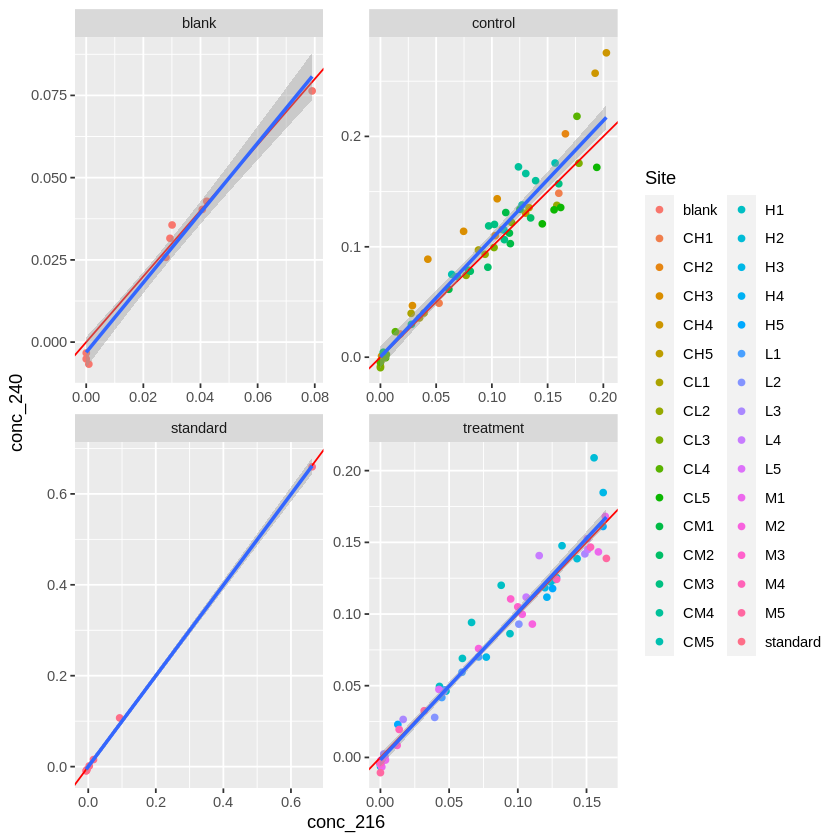

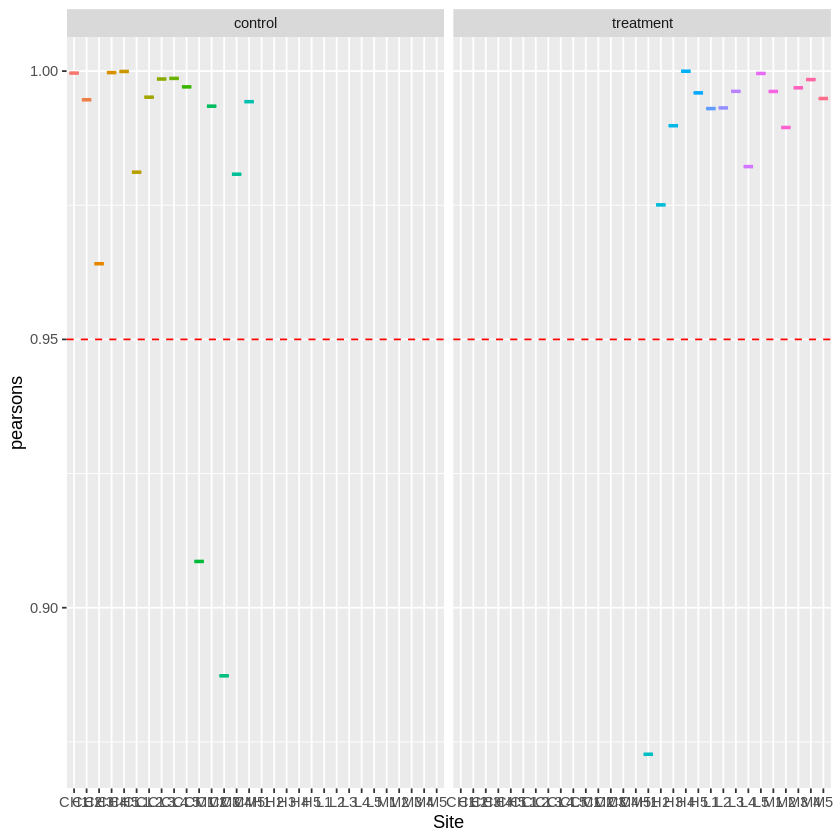

In [16]:
bpca_dt[,conc_240 := predict(conc_240_lm,data.frame(PA_240_nm=PA_240_nm))]
bpca_dt[,conc_216 := predict(conc_216_lm,data.frame(PA_216_nm= (PA_216_nm )))]
bpca_dt[Treatment=='standard',Site:='standard']
bpca_dt[Treatment=='blank',Site:='blank']
bpca_dt[Treatment!='standard',conc_216 := (conc_216^2)/10]
bpca_dt[,pearsons:=cor(conc_240[!is.na(conc_240) & !is.na(conc_216)],conc_216[!is.na(conc_240) & !is.na(conc_216)]),by = .(Site)]

# bpca_dt[pearsons < .95][,list(pearsons = pearsons[1]),by=Site]
bpca_dt[Treatment=='blank']$pearsons %>% mean
bpca_dt[ ] %>%
  ggplot(aes(x=conc_216 ,y=conc_240)) +
  geom_point(aes(color=Site))+
  geom_abline(color='red')+
  geom_smooth(method='lm')+
  # geom_point(data=bpca_dt[conc_240<1 &Site == 'CL2'],method='lm',color='orange')+

  # geom_smooth(data=bpca_dt[conc_240<1 &Site == 'CL2'],method='lm',color='orange')+
  facet_wrap(Treatment~.,scales = 'free')

bpca_dt[Treatment %in% c('control','treatment')  ]  %>%
  ggplot(aes(y=pearsons,x=Site)) +
  geom_boxplot(aes(color=Site))+
  theme(legend.position = "none")  +
  geom_hline(yintercept = .95,color='red',linetype='dashed')+
  # geom_abline(color='red')+
  # geom_smooth(method='lm')+
  facet_wrap(Treatment~.)

In [17]:
# bpca_dt %>% head

In [18]:
bpca_dt[,Depth := paste0(Depth_upper,'-',Depth_lower) %>%  factor(levels= c('0-5','5-10','10-20','10-30','20-30','blank'))]

In [19]:
bpca_dt[is.na(Depth),Depth:='blank']

In [20]:
bpca_dt[,conc_mean:= mean(c(conc_240,conc_216),na.rm=T),by=1:nrow(bpca_dt)]

In [21]:
# bpca_dt %>%head

Warning message:
“Removed 4 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


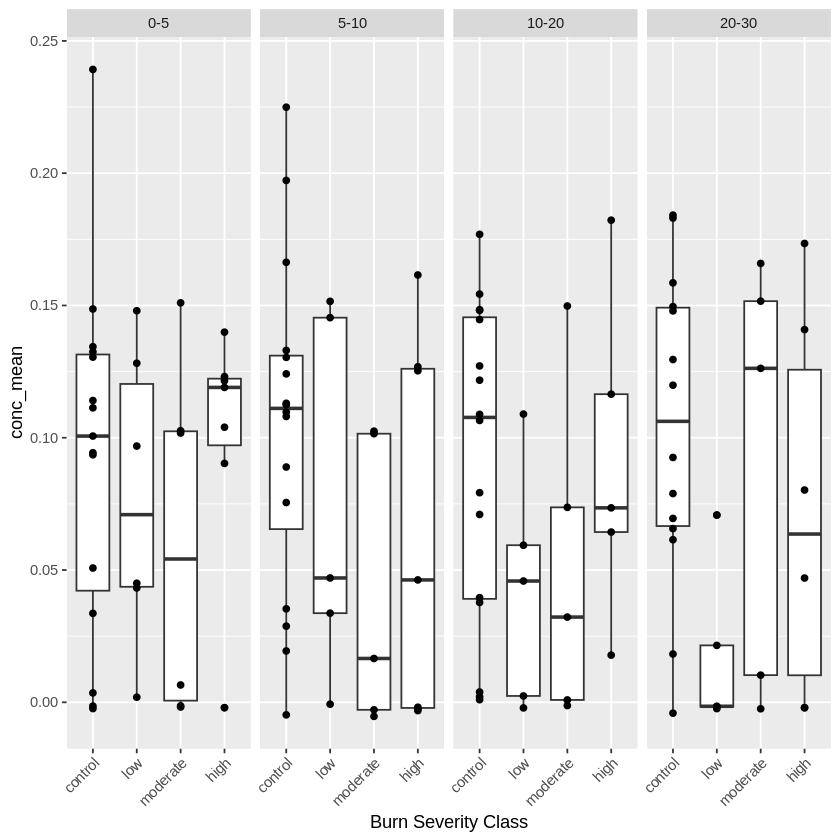

In [22]:
bpca_dt[!is.na(`Burn_severity`) &
        Burn_severity != 'blank'  &
        Depth != '10-30' ] %>%

ggplot(aes(x = factor(Burn_severity,
        level=c('control', 'low', 'moderate','high')),
        y = conc_mean)) +
    geom_boxplot( ) +
    geom_point()+
    facet_grid(.~Depth) +
    # ylim(0,1000000)+
    xlab('Burn Severity Class') +
        theme(axis.text.x = element_text(angle = 45, hjust=1))

Warning message:
“Removed 4 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


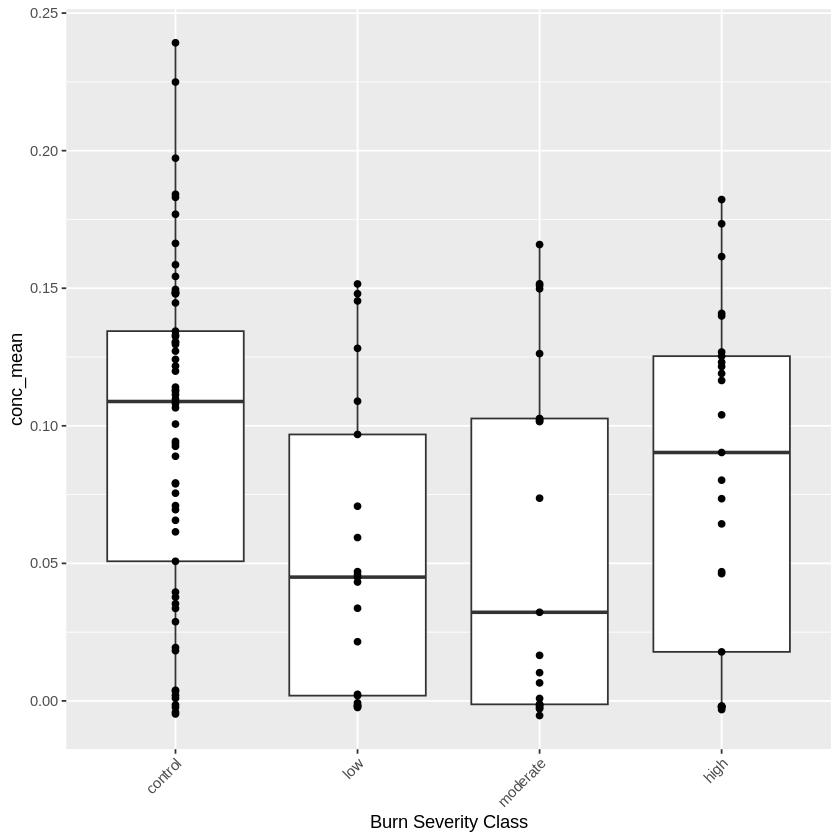

In [23]:
bpca_dt[!is.na(`Burn_severity`) &
        Burn_severity != 'blank'  &
        Depth != '10-30' ] %>%

ggplot(aes(x = factor(Burn_severity,
        level=c('control', 'low', 'moderate','high')),
        y = conc_mean)) +
    geom_boxplot( ) +
    geom_point()+
    # facet_grid(.~.) +
    # ylim(0,1000000)+
    xlab('Burn Severity Class') +
        theme(axis.text.x = element_text(angle = 45, hjust=1))

Warning message:
“Removed 4 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


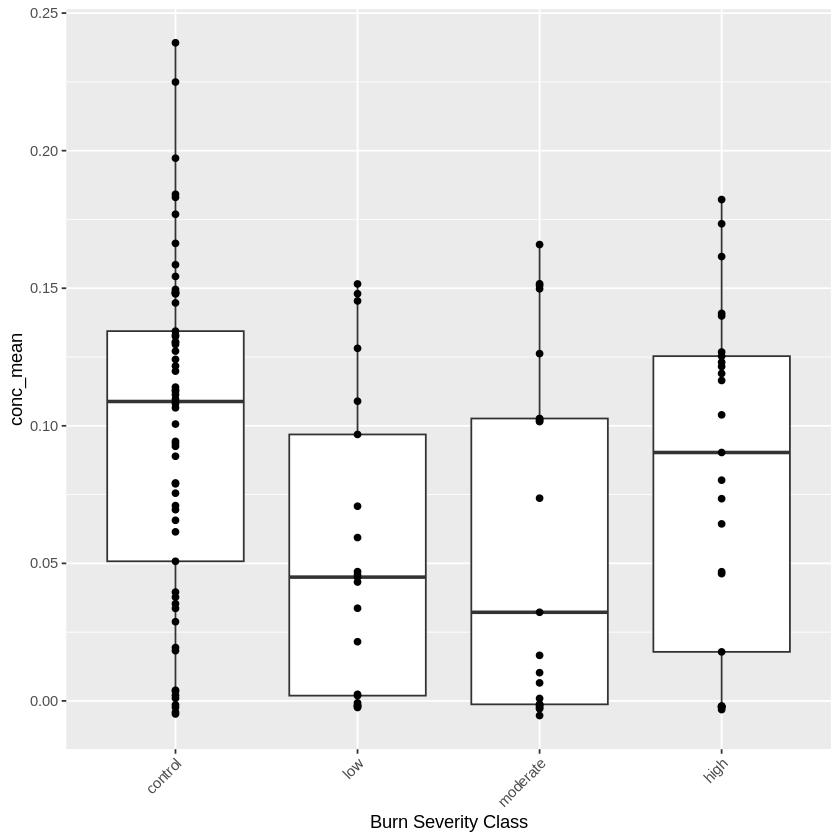

In [24]:
bpca_dt[!is.na(`Burn_severity`) &
        Burn_severity != 'blank'  &
        Depth != '10-30' ] %>%

ggplot(aes(x = factor(Burn_severity,
        level=c('control', 'low', 'moderate','high')),
        y = conc_mean)) +
    geom_boxplot( ) +
    geom_point()+
    # geom_smooth(method = 'lm')+
    # facet_grid(.~.) +
    #  ylim(0,10000000)+
#   geom_smooth(method = 'lm')+
    xlab('Burn Severity Class') +
        theme(axis.text.x = element_text(angle = 45, hjust=1))


In [25]:
# LF_stoic_dt %>% head

In [26]:
LF_stoic_dt <- data_list[["Frac BPCA"]]
LF_stoic_dt[,Depth := paste0(depth_upper_cm %>% as.numeric,'-',depth_lower_cm %>% as.numeric) %>%  factor(levels= c('0-5','5-10','10-20','10-30','20-30','blank'))]

Warning message in depth_upper_cm %>% as.numeric:
“NAs introduced by coercion”
Warning message in depth_lower_cm %>% as.numeric:
“NAs introduced by coercion”


In [27]:
LF_stoic_dt$PA_240_nm  <- LF_stoic_dt$`240_nm_PA`
LF_stoic_dt$PA_216_nm  <- LF_stoic_dt$`216_nm_PA`


LF_stoic_dt[,conc_240 := predict(conc_240_lm,data.frame(PA_240_nm=PA_240_nm))]
LF_stoic_dt[,conc_216 := predict(conc_216_lm,data.frame(PA_216_nm= (PA_216_nm )))]
LF_stoic_dt[ ,conc_216 := (conc_216^2)/10]

LF_stoic_dt[,blank_conc_240 := predict(conc_240_lm,data.frame(PA_240_nm=blank1_240_nm_PA))]
LF_stoic_dt[,blank_conc_216 := predict(conc_216_lm,data.frame(PA_216_nm= (blank1_216_nm_PA )))]
LF_stoic_dt[ ,blank_conc_216 := (blank_conc_216^2)/10]

In [28]:
# LF_stoic_dt %>%names

In [29]:
LF_stoic_dt[conc_240>.8]$conc_240 <- NA

In [30]:
LF_stoic_dt %>% names

[1] "site"                           "burn_severity"                 
 [3] "depth_upper_cm"                 "depth_lower_cm"                
 [5] "fraction"                       "fractionation_mass_recovered_g"
 [7] "starting_fract_mass_soil_g"     "mass_proportion_recovered"     
 [9] "recovery"                       "C_perc"                        
[11] "N_perc"                         "rerun"                         
[13] "frac_notes"                     "accept"                        
[15] "BPCA_Run"                       "BPCA_Run2"                     
[17] "240_nm_PA"                      "216_nm_PA"                     
[19] "BPCA_rep1_notes"                "240_nm_PA_dupe"                
[21] "216_nm_PA_dupe"                 "BPCA_rep2_notes"               
[23] "blank1_240_nm_PA"               "blank1_216_nm_PA"              
[25] "blank2_240_nm_PA"               "blank2_216_nm_PA"              
[27] "Depth"                          "PA_240_nm"                     
[29] "PA_216_nm"                      "conc_240"                      
[31] "conc_216"                       "blank_conc_240"                
[33] "blank_conc_216"

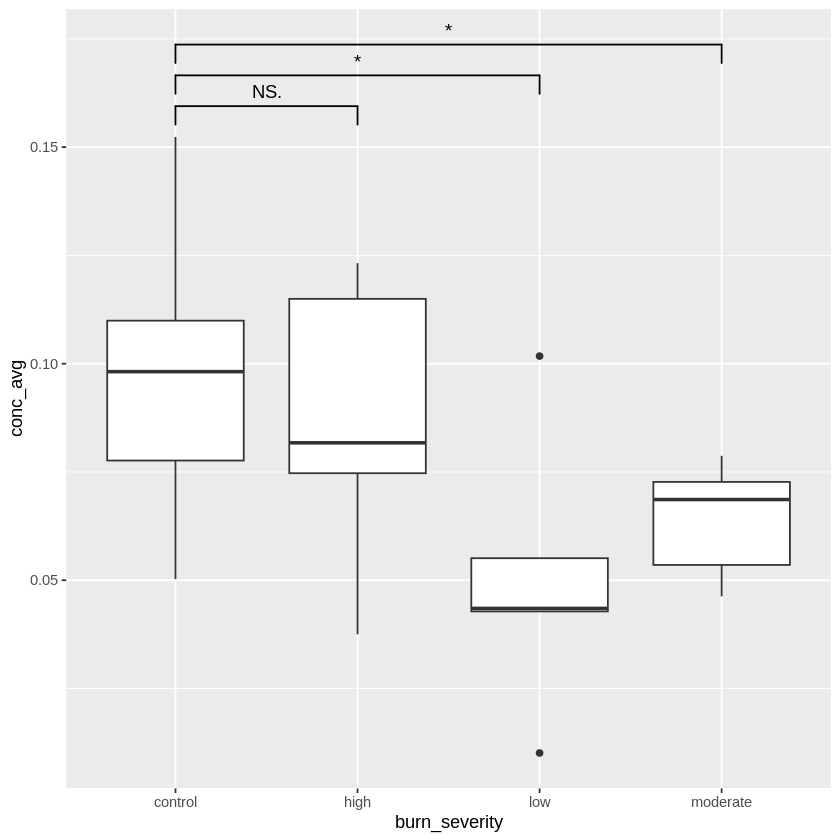

In [31]:

LF_stoic_dt[,Depth := factor(Depth, levels = c('0-5','5-10','10-20','20-30'))]
LF_stoic_dt[,conc_avg := mean(c(conc_216,conc_240),na.rm=T),by=1:nrow(LF_stoic_dt)]



LF_stoic_dt[!is.na(Depth)][,list(conc_avg = mean(conc_avg,na.rm=T)),by=.(site,burn_severity)] %>%
ggplot(aes(y=conc_avg,x=burn_severity))+
  geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
    geom_boxplot(aes(group=burn_severity))
    # facet_wrap(.~.)


In [41]:
join_dt <- LF_stoic_dt_old[,.(Site,Depth,Fract,bpca_starting_mass_mg)]

In [42]:
names(join_dt) <- c('site','Depth','fraction','bpca_starting_mass_mg')

In [43]:
LF_stoic_dt[,Burn_severity := factor(burn_severity,levels=c('control','high', 'moderate', 'low'))]


In [45]:
#  LF_stoic_dt<- hold_dt


In [46]:
LF_stoic_dt <- merge(LF_stoic_dt,join_dt,by=c('site','Depth','fraction'),all = T)

-ANOVA to test for differences in POM-PyC by burn severity
-ANOVA to test for differences in POM-C vs. MAOM-C

In [50]:
LF_stoic_dt$g_kg <- (LF_stoic_dt$conc_avg/LF_stoic_dt$bpca_starting_mass_mg)
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),list(g_kg=mean(g_kg,na.rm = T)),by=.(burn_severity,site,Depth)] %>%
aov(g_kg ~ burn_severity, data = .) %>%
summary()

               Df  Sum Sq   Mean Sq F value Pr(>F)  
burn_severity   3 0.00345 0.0011495   3.736 0.0134 *
Residuals     109 0.03353 0.0003077                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
7 observations deleted due to missingness

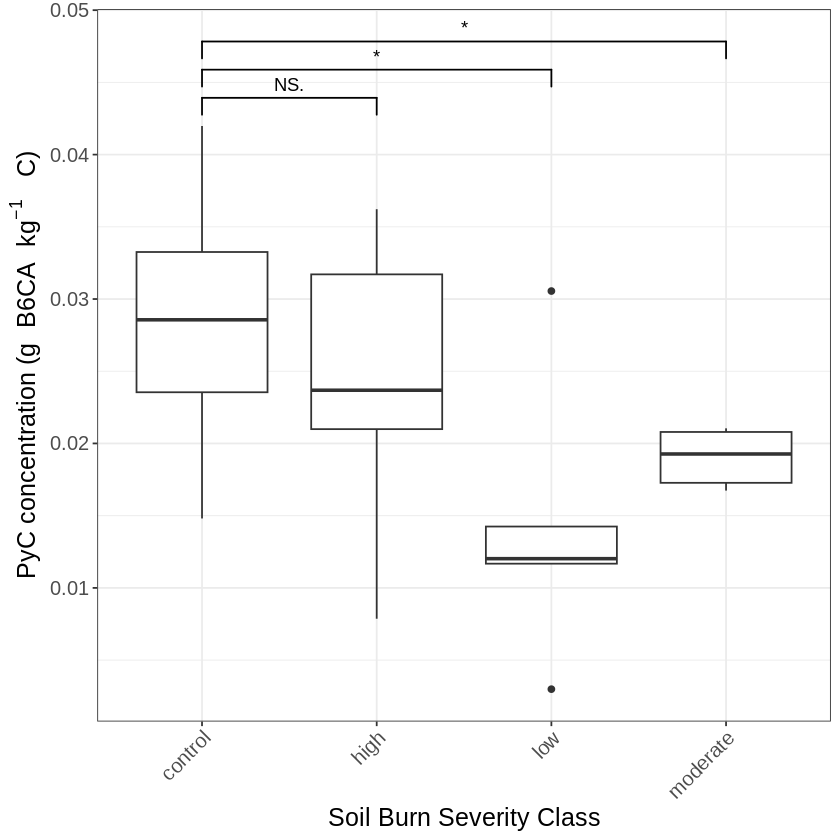

In [51]:
# (conc_240/bpca_starting_mass_mg)*(fractionation_mass_recovered_g/starting_fract_mass_soil_g)*(C/100)
LF_stoic_dt[,g_kg := (conc_avg/bpca_starting_mass_mg) ]
LF_stoic_dt[,g_kg := mass_proportion_recovered/conc_avg,by=1:nrow(LF_stoic_dt)]
LF_stoic_dt$g_kg <- (LF_stoic_dt$conc_avg/LF_stoic_dt$bpca_starting_mass_mg)
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),list(g_kg=mean(g_kg,na.rm = T)),by=.(burn_severity,site)] %>%
ggplot(aes(x = burn_severity, y = g_kg)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
  # facet_grid(.~Depth) +
  coord_cartesian(expand=TRUE)

In [52]:
# LF_stoic_dt[,g_kg := (conc_avg/bpca_starting_mass_mg) ]
# LF_stoic_dt[,g_kg := mass_proportion_recovered/conc_avg,by=1:nrow(LF_stoic_dt)]
LF_stoic_dt$g_kg <- (LF_stoic_dt$conc_avg/LF_stoic_dt$bpca_starting_mass_mg)
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),]  %>%
aov(g_kg ~ burn_severity +Depth, data = .) %>%
summary()

               Df  Sum Sq   Mean Sq F value Pr(>F)  
burn_severity   3 0.00295 0.0009827   3.183 0.0264 *
Depth           3 0.00060 0.0002004   0.649 0.5849  
Residuals     120 0.03705 0.0003087                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
304 observations deleted due to missingness

Interpretation:

    Burn Severity:
        The p-value for burn_severity is 0.0264, which is less than 0.05. This indicates that there are statistically significant differences in your dependent variable across the different levels of burn_severity.
        The asterisk (*) next to the p-value for burn_severity denotes significance at the 0.05 level.

    Depth:
        The p-value for Depth is 0.5849, which is greater than 0.05. This suggests that the differences in your dependent variable across the different levels of Depth are not statistically significant.

    Residuals:
        This represents the variability not explained by the two factors.

    Note on Missingness:
        The output mentions "48 observations deleted due to missingness." This indicates that some data points were not included in the analysis due to missing values. It's important to consider whether this missingness might bias your results.

Those two anova together show that there are statistically signficant differences in PyC, and that they vary by burn severity, not depth.

Warning message:
“Removed 304 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 304 rows containing non-finite values (`stat_signif()`).”


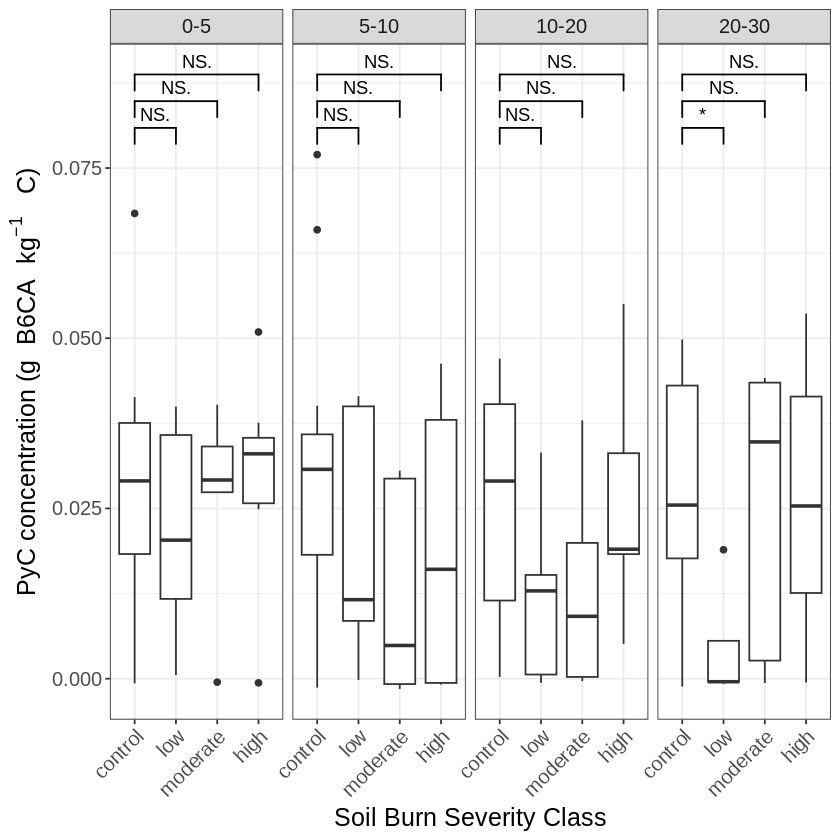

In [62]:

LF_stoic_dt$g_kg <- (LF_stoic_dt$conc_avg/LF_stoic_dt$bpca_starting_mass_mg)
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),] %>%
ggplot(aes(x = burn_severity, y = g_kg)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
  facet_grid(.~Depth) +
  coord_cartesian(expand=TRUE)

In [55]:
# LF_stoic_dt[,g_kg := (conc_avg/bpca_starting_mass_mg) ]
# LF_stoic_dt[,g_kg := mass_proportion_recovered/conc_avg,by=1:nrow(LF_stoic_dt)]
# LF_stoic_dt$g_kg <- (LF_stoic_dt$conc_avg/LF_stoic_dt$bpca_starting_mass_mg)
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),][fraction == 'LF']  %>%
aov(C_perc ~ burn_severity + Depth, data = .) %>%
summary()

LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),][fraction == 'HF']  %>%
aov(C_perc ~ burn_severity + Depth, data = .) %>%
summary()

               Df Sum Sq Mean Sq F value   Pr(>F)    
burn_severity   3    469  156.48   7.799 6.57e-05 ***
Depth           3    284   94.80   4.725  0.00342 ** 
Residuals     170   3411   20.06                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               Df Sum Sq Mean Sq F value   Pr(>F)    
burn_severity   3   1.60   0.533   0.905 0.440935    
Depth           3  12.61   4.204   7.139 0.000181 ***
Residuals     127  74.80   0.589                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

There is also a signficant difference in the overall percentatge of carbon by burn_severity, depth. This is only true for the light fraction.

Warning message in wilcox.test.default(c(6.61, 13.92, 12.1, 7.06, 2.86, 6.98, 5.02, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(4.17, 7.59, 5.42, 2.75, 3.39, 1.5, 2.99, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(4.17, 7.59, 5.42, 2.75, 3.39, 1.5, 2.99, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(4.17, 7.59, 5.42, 2.75, 3.39, 1.5, 2.99, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(1.75, 3.12, 4.46, 2.87, 2.49, 2.49, 0.99, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(1.75, 3.12, 4.46, 2.87, 2.49, 2.49, 0.99, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(1.75, 3.12, 4.46, 2.87, 2.49, 2.49, 0.99, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(1.59, 2.78, 2.48, 2.24, 0.88, 1.4, 1.39, :
“cannot compute exact p-value with t

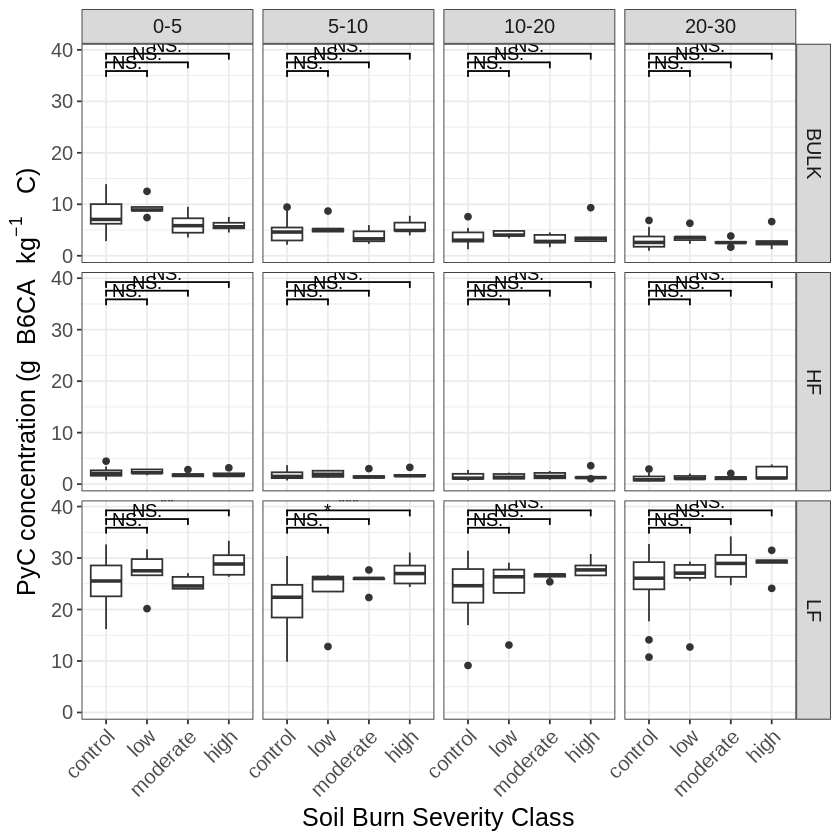

In [63]:

LF_stoic_dt$g_kg <- (LF_stoic_dt$conc_avg/LF_stoic_dt$bpca_starting_mass_mg)
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),] %>%
ggplot(aes(x = burn_severity, y = C_perc)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
  facet_grid(fraction~Depth) +
  coord_cartesian(expand=TRUE)

In [56]:

LF_stoic_dt[,burn_severity :=factor(burn_severity,
        level=c('control', 'low', 'moderate','high'))]

In [57]:
LF_stoic_dt[,Depth :=factor(Depth,
        level= c('0-5','5-10','10-20' ,'20-30' ))]

        # factor(levels= c('0-5','5-10','10-20','10-30','20-30','blank'))

In [58]:
LF_stoic_dt[,C_N:=C_perc/ N_perc]

LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),][C_perc/N_perc <100][fraction == 'LF']  %>%
aov(C_N ~ burn_severity + Depth, data = .) %>%
summary()

               Df Sum Sq Mean Sq F value   Pr(>F)    
burn_severity   3    565   188.3   3.352   0.0204 *  
Depth           3   4537  1512.5  26.933 2.83e-14 ***
Residuals     168   9434    56.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

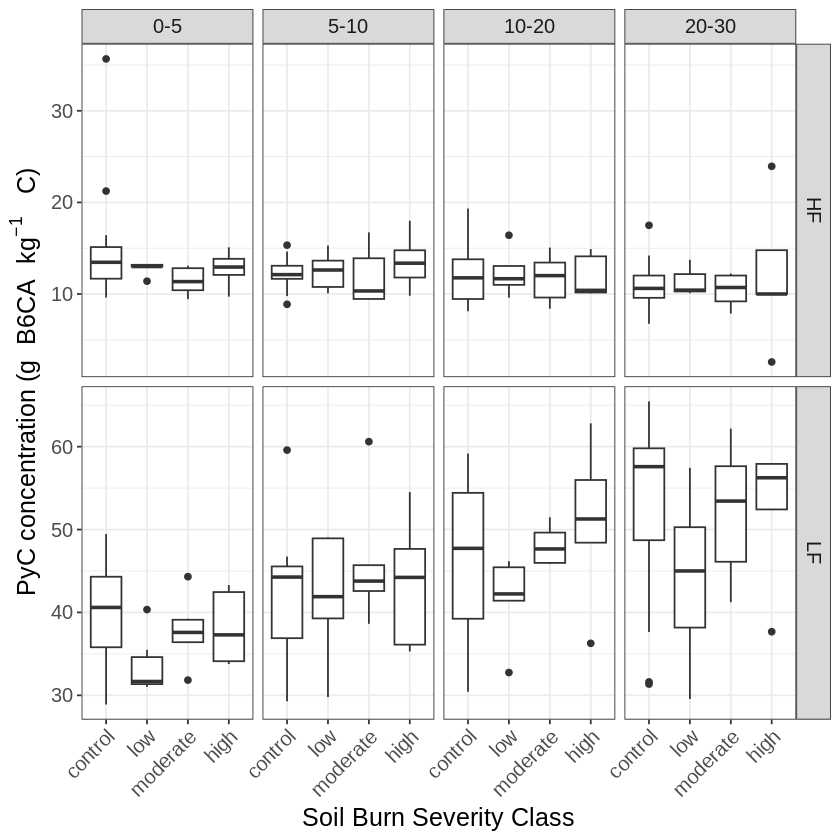

In [59]:
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),][fraction !='BULK'][C_perc/N_perc <100] %>%
ggplot(aes(x = burn_severity, y =C_N)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  # geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
  #           map_signif_level=TRUE,step_increase=.05) +
  facet_grid(fraction~Depth,scales = 'free_y') +
  coord_cartesian(expand=TRUE)

In [60]:
LF_stoic_dt[,C_N:=C_perc/ N_perc]

LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),][C_perc/N_perc <100][fraction == 'LF']  %>%
aov(C_N ~ burn_severity + Depth, data = .) %>%
summary()

               Df Sum Sq Mean Sq F value   Pr(>F)    
burn_severity   3    565   188.3   3.352   0.0204 *  
Depth           3   4537  1512.5  26.933 2.83e-14 ***
Residuals     168   9434    56.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

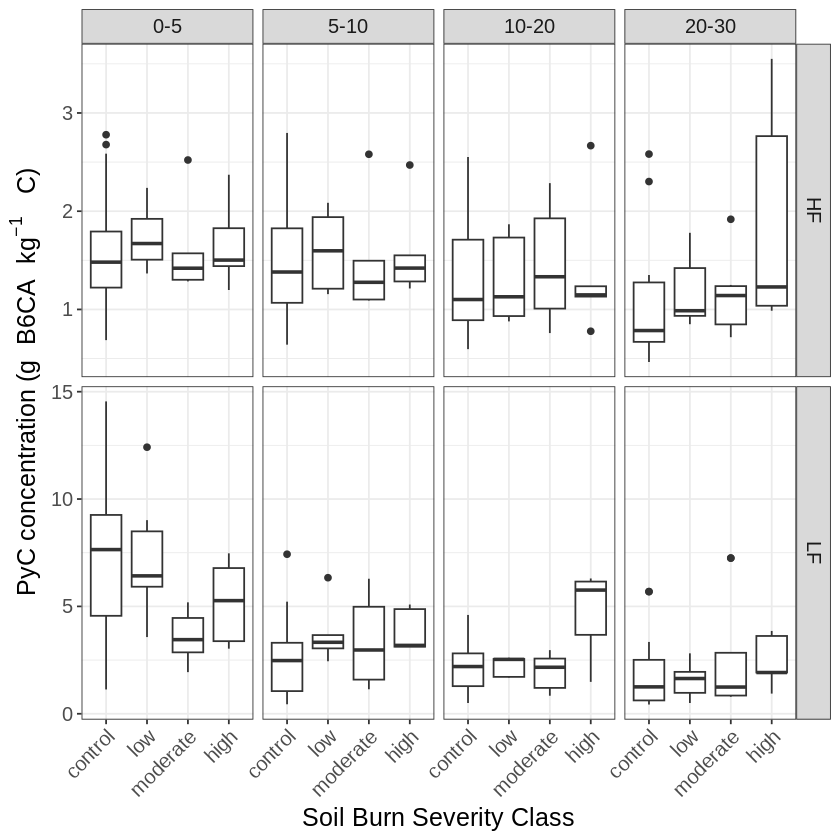

In [61]:
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),][fraction !='BULK'][C_perc/N_perc <100] %>%
ggplot(aes(x = burn_severity, y =mass_proportion_recovered*C_perc,group=burn_severity)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  # geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
  #           map_signif_level=TRUE,step_increase=.05) +
  facet_grid(fraction~Depth,scales = 'free_y') +
  coord_cartesian(expand=TRUE)